In [1]:
# Imports
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
# Read files 

flt_info = pd.read_csv('../data/raw/flight_information.csv', index_col = 0)
ground_info = pd.read_csv('../data/raw/ground_information.csv', index_col = 0)

# Structure

1. Data Type Categorization (numerical, Categorical)
2. For both create
2.1 Data Summary
2.2 Graphical Representation
2.3 Interaction 

# Initial Dataset Structure

In [3]:
# some general functions

def na_count(df):
    '''Takes a Pandas dataframe as input and returns NA-Values per attribute.'''
    for attribute in df.columns:
        print(str(attribute) + " NAs: " + str(df[attribute].isna().sum()) + "(" + str(round(df[attribute].isna().sum() / df[attribute].count() *100, 2)) + "%)" )



## Flight Info

In [4]:
# First analysis

# Here we first try to understand the data
#Flight dataset
flt_info.head()


,leg_no,fn_carrier,fn_number,dep_ap_sched,arr_ap_sched,dep_sched_date,dep_sched_time,arr_sched_date,arr_sched_time,m_offblockdt,...,change_reason_code,dep_delay,Ac Type Code,trans_time,sched_trans_time,Crew Group,TLC_trans,crew_type_change,Sched Groundtime,Act Groundtime
0,272005011,East Carmen Airlines,EC3098,North Gregory,East Carmen,2019-06-01,00:40,2019-06-01,04:30,2019-06-01 00:43:00,...,other problem,3.0,320,0,0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0
1,272009188,East Carmen Airlines,EC3146,Port Bobby,East Carmen,2019-06-01,02:05,2019-06-01,04:00,2019-06-01 01:58:00,...,no reason,-7.0,E95,0,0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0
2,271984537,East Carmen Airlines,EC2840,Port Ryan,East Carmen,2019-06-01,02:20,2019-06-01,03:50,2019-06-01 02:24:00,...,other problem,4.0,DH4,0,0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0
3,272025831,East Carmen Airlines,EC3306,Coleland,East Carmen,2019-06-01,02:25,2019-06-01,04:00,2019-06-01 02:28:00,...,other problem,3.0,320,0,0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0
4,272006092,East Carmen Airlines,EC3114,East Melissaberg,East Carmen,2019-06-01,02:30,2019-06-01,04:15,2019-06-01 03:02:00,...,other problem,32.0,DH4,0,0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0


In [18]:
# Count of rows and columns of our data set
flt_info.shape

(12017, 22)

In [19]:
# Count the number of NAs per variable
na_count(flt_info)

flt_info.describe()

leg_no NAs: 0(0.0%)
fn_carrier NAs: 0(0.0%)
fn_number NAs: 0(0.0%)
dep_ap_sched NAs: 0(0.0%)
arr_ap_sched NAs: 0(0.0%)
dep_sched_date NAs: 0(0.0%)
dep_sched_time NAs: 0(0.0%)
arr_sched_date NAs: 0(0.0%)
arr_sched_time NAs: 0(0.0%)
m_offblockdt NAs: 0(0.0%)
m_onblockdt NAs: 83(0.7%)
ac_registration NAs: 0(0.0%)
change_reason_code NAs: 0(0.0%)
dep_delay NAs: 0(0.0%)
Ac Type Code NAs: 0(0.0%)
trans_time NAs: 0(0.0%)
sched_trans_time NAs: 0(0.0%)
Crew Group NAs: 0(0.0%)
TLC_trans NAs: 0(0.0%)
crew_type_change NAs: 0(0.0%)
Sched Groundtime NAs: 2013(20.12%)
Act Groundtime NAs: 2075(20.87%)


,leg_no,dep_delay,trans_time,sched_trans_time,Sched Groundtime,Act Groundtime
count,1.201700e+04,12017.000000,12017.000000,12017.000000,10004.000000,9942.000000
mean,2.720514e+08,25.782558,27.725139,34.985021,62.837865,66.549789
std,9.583346e+04,25.641251,31.900547,31.507227,56.174341,70.686529
min,2.719556e+08,-14.000000,-134.000000,0.000000,-245.000000,-383.000000
25%,2.719825e+08,9.000000,0.000000,0.000000,45.000000,33.000000
50%,2.720115e+08,17.000000,28.000000,45.000000,50.000000,60.000000
75%,2.721016e+08,34.000000,49.000000,50.000000,65.000000,87.000000
max,2.723603e+08,476.000000,470.000000,495.000000,945.000000,947.000000


<AxesSubplot:>

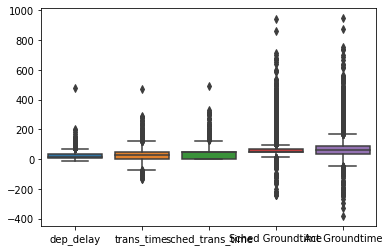

In [23]:
sns.boxplot(data = flt_info.drop(['leg_no'], axis = 1))

 ## Ground Info

In [9]:
# Ground Info Dataset
ground_info.head()

,Unnamed: 0,day_of_origin,ac_type,fn_number,ac_registration,mingt,dep_leg_inbound,arr_leg_inbound,arr_leg_outbound,sched_inbound_dep,sched_inbound_arr,sched_outbound_dep,sched_outbound_arr,sched_turnaround,leg_inbound,leg_outbound,catering_duration,cleaning_duration,pax_boarding_duration
0,0,2019-06-01,DH4,EC3114,ECLGNX,35,East Melissaberg,East Carmen,Keithberg,2019-06-01 02:30:00,2019-06-01 04:15:00,2019-06-01 04:50:00,2019-06-01 05:40:00,35,272006092,272205857,26,NaN,26.0
1,1,2019-06-01,320,EC3316,ECLBIX,40,East Latashaview,East Carmen,Juliemouth,2019-06-01 03:15:00,2019-06-01 07:05:00,2019-06-01 07:50:00,2019-06-01 12:05:00,45,272027070,272029306,27,NaN,15.0
2,2,2019-06-01,321,EC3292,ECLBAX,45,New Jessica,East Carmen,South Nathaniel,2019-06-01 03:25:00,2019-06-01 06:45:00,2019-06-01 08:20:00,2019-06-01 10:35:00,95,272024970,272022230,27,NaN,25.0
3,3,2019-06-01,E95,EC3420,ECLWFX,40,East Allisontown,East Carmen,Yoderburgh,2019-06-01 04:00:00,2019-06-01 04:35:00,2019-06-01 05:30:00,2019-06-01 07:05:00,55,272034482,271961698,18,NaN,11.0
4,4,2019-06-01,DH4,EC3400,ECLGBX,30,Port Courtneytown,East Carmen,West Ana,2019-06-01 04:00:00,2019-06-01 04:35:00,2019-06-01 05:10:00,2019-06-01 07:10:00,35,272033720,271984663,15,NaN,12.0
